## Pairs trading experiment 

Source code can be found on [my GitHub repository](https://github.com/atwalsh/pairs).

---

Import data set class, pandas for data manipulation, numpy for correlation dataframe manipulation, and plotting library.

See [data_set.py](https://github.com/atwalsh/pairs/blob/master/pairs/data_set.py)

In [ ]:
from pairs import DataSet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Initialized the DataSet for year 2017. This will read NASDAQ and NYSE data by default.

This object contains the following DataFrames for 2017:
- Closing price
- Trading volume (closing price * volume for each day)
- Liquid stocks (stocks with > $1 million average trading volume for the time of the closing price set)
- Correlation matric for liquid stocks

In [2]:
ds = DataSet(year=2017)

Preparing data for 2017


#### Closing price DataFrame

In [5]:
ds.closing_data

ticker,A,AA,AAAP,AAC,AAL,AAME,AAN,AAOI,AAON,AAP,...,ZNGA,ZNH,ZOES,ZSAN,ZTO,ZTR,ZTS,ZUMZ,ZX,ZYNE
date,,,,,,,,,,,,,,,,,,,,,
2017-01-03,46.49,28.83,27.16,7.72,46.30,4.100,31.90,23.10,33.35,170.60,...,2.65,26.210,23.48,0.780,12.19,11.83,53.59,22.000,1.23,17.95
2017-01-04,47.10,30.26,27.25,7.69,46.70,4.100,32.57,23.51,34.10,172.00,...,2.69,27.250,24.63,0.870,12.27,11.90,54.11,22.750,1.25,18.85
2017-01-05,46.54,30.65,27.37,7.54,45.89,3.850,31.31,22.81,33.10,171.88,...,2.65,27.650,25.55,0.970,12.97,11.31,53.93,20.600,1.29,19.20
2017-01-06,47.99,30.68,27.51,7.54,46.21,4.100,30.86,22.42,32.70,169.63,...,2.72,27.160,25.76,1.060,13.34,11.29,54.10,19.850,1.21,18.32
2017-01-09,48.14,29.48,28.03,7.56,47.08,3.950,31.25,22.24,32.80,169.53,...,2.66,27.190,23.66,1.100,13.00,11.26,53.95,19.950,1.22,18.08
2017-01-10,48.10,30.98,28.35,7.92,48.48,4.050,32.44,22.87,33.40,169.92,...,2.60,28.850,23.64,1.030,13.53,11.25,53.93,20.200,1.17,19.80
2017-01-11,49.25,31.97,28.84,8.26,48.64,4.050,32.50,22.72,33.75,173.43,...,2.63,28.280,23.05,1.070,13.65,11.23,53.31,19.750,1.19,19.11
2017-01-12,48.52,33.04,29.01,8.00,48.10,3.850,32.41,29.86,32.60,174.47,...,2.67,27.900,22.53,1.290,13.26,11.18,53.39,19.600,1.17,19.29
2017-01-13,48.69,33.01,29.13,8.09,47.65,3.950,32.05,28.22,32.90,174.79,...,2.64,27.840,21.90,1.200,12.84,11.23,53.74,19.850,1.20,18.69


#### Trading volume DataFrame

In [4]:
ds.volume_data

ticker,A,AA,AAAP,AAC,AAL,AAME,AAN,AAOI,AAON,AAP,...,ZNGA,ZNH,ZOES,ZSAN,ZTO,ZTR,ZTS,ZUMZ,ZX,ZYNE
date,,,,,,,,,,,,,,,,,,,,,
2017-01-03,80878653.0,79184478.0,1757252.0,1685276.0,311955510.0,40590.0,24256760.0,6193110.0,4588960.0,117969900.0,...,51985315.0,398392.0,13442300.0,43134.0,27958984.0,1516606.0,191868277.0,14951200.0,12054.0,7368475.0
2017-01-04,85778520.0,101053270.0,1994700.0,1980944.0,273643320.0,18450.0,18923170.0,4680841.0,4941090.0,110475600.0,...,25854397.0,1354325.0,9711609.0,169476.0,24236931.0,4510100.0,179444993.0,12728625.0,3125.0,10904725.0
2017-01-05,69982198.0,74923925.0,1776313.0,1900080.0,313213017.0,26565.0,15748930.0,3665567.0,4849150.0,147971492.0,...,15782340.0,904155.0,10610915.0,169944.0,53084913.0,2777736.0,133158563.0,17019720.0,11610.0,8375040.0
2017-01-06,138374366.0,64007684.0,3114132.0,738166.0,335489221.0,4100.0,21277970.0,4963788.0,2619270.0,140436677.0,...,16309120.0,385672.0,15680112.0,611090.0,29514750.0,1970105.0,153952370.0,9039690.0,6292.0,5968656.0
2017-01-09,123974942.0,123963400.0,1398697.0,1102248.0,223116828.0,26860.0,20706250.0,7726176.0,8570640.0,94953753.0,...,28194404.0,296371.0,35284158.0,180290.0,15949700.0,2018918.0,114552035.0,10713150.0,10980.0,3852848.0
2017-01-10,75060050.0,118479912.0,703080.0,1109592.0,362809776.0,19440.0,31933936.0,4523686.0,6158960.0,105571296.0,...,24431160.0,1249205.0,13058736.0,186327.0,29721351.0,1894500.0,112551910.0,12107880.0,16380.0,9373320.0
2017-01-11,276996775.0,98090354.0,1493912.0,1561966.0,336866048.0,0.0,41187250.0,8556352.0,5082750.0,154179270.0,...,23181346.0,263004.0,12380155.0,181793.0,25432680.0,2316749.0,181280655.0,6876950.0,16660.0,5706246.0
2017-01-12,158995188.0,149396968.0,4368906.0,1390400.0,262048800.0,6930.0,21766556.0,131796068.0,3885920.0,130329090.0,...,20235663.0,167400.0,13272423.0,2101668.0,17077554.0,2135380.0,80811104.0,5180280.0,9009.0,3246507.0
2017-01-13,76389741.0,99908066.0,1392414.0,478928.0,168771535.0,18960.0,17528145.0,43249972.0,3905230.0,209066319.0,...,27270408.0,161472.0,13361190.0,315720.0,18443376.0,1663163.0,132125164.0,2792895.0,3720.0,3324951.0


#### Liquid stock DataFrame

In [6]:
ds.liquid_stocks

ticker,A,AA,AAAP,AAC,AAL,AAN,AAOI,AAON,AAP,AAPL,...,ZIXI,ZN,ZNGA,ZOES,ZSAN,ZTO,ZTR,ZTS,ZUMZ,ZYNE
date,,,,,,,,,,,,,,,,,,,,,
2017-01-03,80878653.0,79184478.0,1757252.0,1685276.0,311955510.0,24256760.0,6193110.0,4588960.0,117969900.0,3.343006e+09,...,1143280.0,278110.0,51985315.0,13442300.0,43134.0,27958984.0,1516606.0,191868277.0,14951200.0,7368475.0
2017-01-04,85778520.0,101053270.0,1994700.0,1980944.0,273643320.0,18923170.0,4680841.0,4941090.0,110475600.0,2.450122e+09,...,2181000.0,163592.0,25854397.0,9711609.0,169476.0,24236931.0,4510100.0,179444993.0,12728625.0,10904725.0
2017-01-05,69982198.0,74923925.0,1776313.0,1900080.0,313213017.0,15748930.0,3665567.0,4849150.0,147971492.0,2.587984e+09,...,681508.0,507564.0,15782340.0,10610915.0,169944.0,53084913.0,2777736.0,133158563.0,17019720.0,8375040.0
2017-01-06,138374366.0,64007684.0,3114132.0,738166.0,335489221.0,21277970.0,4963788.0,2619270.0,140436677.0,3.743867e+09,...,766360.0,160016.0,16309120.0,15680112.0,611090.0,29514750.0,1970105.0,153952370.0,9039690.0,5968656.0
2017-01-09,123974942.0,123963400.0,1398697.0,1102248.0,223116828.0,20706250.0,7726176.0,8570640.0,94953753.0,3.993530e+09,...,897260.0,139360.0,28194404.0,35284158.0,180290.0,15949700.0,2018918.0,114552035.0,10713150.0,3852848.0
2017-01-10,75060050.0,118479912.0,703080.0,1109592.0,362809776.0,31933936.0,4523686.0,6158960.0,105571296.0,2.913669e+09,...,1246448.0,179077.0,24431160.0,13058736.0,186327.0,29721351.0,1894500.0,112551910.0,12107880.0,9373320.0
2017-01-11,276996775.0,98090354.0,1493912.0,1561966.0,336866048.0,41187250.0,8556352.0,5082750.0,154179270.0,3.302454e+09,...,1495992.0,160245.0,23181346.0,12380155.0,181793.0,25432680.0,2316749.0,181280655.0,6876950.0,5706246.0
2017-01-12,158995188.0,149396968.0,4368906.0,1390400.0,262048800.0,21766556.0,131796068.0,3885920.0,130329090.0,3.229803e+09,...,849420.0,84189.0,20235663.0,13272423.0,2101668.0,17077554.0,2135380.0,80811104.0,5180280.0,3246507.0
2017-01-13,76389741.0,99908066.0,1392414.0,478928.0,168771535.0,17528145.0,43249972.0,3905230.0,209066319.0,3.107408e+09,...,561330.0,71022.0,27270408.0,13361190.0,315720.0,18443376.0,1663163.0,132125164.0,2792895.0,3324951.0


#### Liquid stocks correlation

In [10]:
ds.liquid_corr

ticker,A,AA,AAAP,AAC,AAL,AAN,AAOI,AAON,AAP,AAPL,...,ZIXI,ZN,ZNGA,ZOES,ZSAN,ZTO,ZTR,ZTS,ZUMZ,ZYNE
ticker,,,,,,,,,,,,,,,,,,,,,
A,1.000000,0.081415,-0.031959,0.030681,-0.015214,0.027384,-0.086513,0.044540,0.317125,0.066117,...,0.071348,-0.075012,0.063014,0.127241,0.121771,0.136515,0.080561,0.135047,0.050784,-0.068628
AA,0.081415,1.000000,0.023064,0.014622,0.044007,0.004585,-0.138951,0.050348,-0.064357,0.011126,...,-0.007699,-0.085134,0.020346,-0.042961,0.194371,0.026586,-0.135345,0.148017,0.046931,0.050018
AAAP,-0.031959,0.023064,1.000000,0.084900,-0.098549,0.209179,-0.120213,0.048884,-0.052755,0.209714,...,-0.059784,-0.055905,-0.003227,-0.087460,-0.051808,0.074235,-0.133726,0.107543,0.007502,0.048029
AAC,0.030681,0.014622,0.084900,1.000000,-0.101727,0.092017,0.028259,0.151913,-0.012931,0.190990,...,-0.042264,-0.104785,0.237013,0.032423,-0.047567,0.177463,-0.116039,0.159378,0.032977,-0.057208
AAL,-0.015214,0.044007,-0.098549,-0.101727,1.000000,0.130848,-0.085885,0.080921,-0.037332,0.081803,...,0.206955,0.029818,-0.084042,-0.004959,0.045360,-0.092369,0.039509,-0.000415,0.055090,0.047563
AAN,0.027384,0.004585,0.209179,0.092017,0.130848,1.000000,0.053742,0.054011,-0.005856,0.146546,...,0.135125,0.111177,0.078470,-0.086914,-0.027148,0.073356,-0.030577,0.081589,0.009117,0.127591
AAOI,-0.086513,-0.138951,-0.120213,0.028259,-0.085885,0.053742,1.000000,0.079070,0.025648,0.012507,...,0.085244,0.211790,0.304573,-0.060839,-0.105561,-0.056209,0.101672,-0.016221,-0.114740,0.100752
AAON,0.044540,0.050348,0.048884,0.151913,0.080921,0.054011,0.079070,1.000000,-0.041036,0.105315,...,0.224178,-0.101778,0.084040,0.090948,0.041983,0.089792,-0.032551,0.127527,0.161602,0.005615
AAP,0.317125,-0.064357,-0.052755,-0.012931,-0.037332,-0.005856,0.025648,-0.041036,1.000000,0.016393,...,0.004282,0.046649,0.057295,0.168538,-0.007980,-0.046133,0.005618,0.035664,-0.025409,-0.036925


Next, set the top half of correlation matrix to 0 (diagonal and above).

In [8]:
relevant_correlations = pd.DataFrame(data=np.tril(ds.liquid_corr.values, -1),
                                         index=ds.liquid_corr.index,
                                         columns=ds.liquid_corr.columns)

relevant_correlations

ticker,A,AA,AAAP,AAC,AAL,AAN,AAOI,AAON,AAP,AAPL,...,ZIXI,ZN,ZNGA,ZOES,ZSAN,ZTO,ZTR,ZTS,ZUMZ,ZYNE
ticker,,,,,,,,,,,,,,,,,,,,,
A,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
AA,0.081415,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
AAAP,-0.031959,0.023064,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
AAC,0.030681,0.014622,0.084900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
AAL,-0.015214,0.044007,-0.098549,-0.101727,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
AAN,0.027384,0.004585,0.209179,0.092017,0.130848,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
AAOI,-0.086513,-0.138951,-0.120213,0.028259,-0.085885,0.053742,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
AAON,0.044540,0.050348,0.048884,0.151913,0.080921,0.054011,0.079070,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
AAP,0.317125,-0.064357,-0.052755,-0.012931,-0.037332,-0.005856,0.025648,-0.041036,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


Flatten the correlation DataFrame, remove 0 values, sort, then get the top 25 correlations.

In [15]:
flat_correlations = relevant_correlations.unstack() # Flatten
non_zero = flat_correlations[flat_correlations > 0] # Remove 0 values
sorted_values = non_zero.sort_values(ascending=False) # Sort
top_n_values = sorted_values[:25] # Get top 25

top_n_values

ticker  ticker
AOS     DRE       0.971015
        RMD       0.970454
        PKG       0.966842
ARDX    INFI      0.965448
DRE     PKG       0.962781
PKG     RMD       0.960132
DRE     RMD       0.959416
UL      UN        0.948457
UA      UAA       0.946686
CRVS    GNCMA     0.943109
AIMT    DBVT      0.942380
FBZ     FDT       0.942320
DM      HEP       0.939539
GOOG    GOOGL     0.939198
GOV     SPEX      0.935003
MRTX    STAR      0.932190
BSFT    EXAC      0.924145
CDNS    MRTX      0.922411
AIMT    EXAC      0.908779
MDGL    OSIS      0.908549
CUR     RVNC      0.906611
OA      SSNI      0.905345
ARE     RJF       0.904866
CDNS    STAR      0.903106
AIMT    BSFT      0.902502
dtype: float64

### Plot pair closing values for 2017

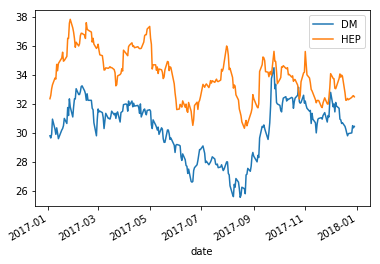

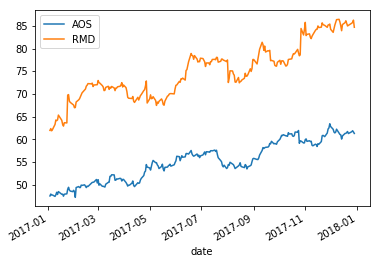

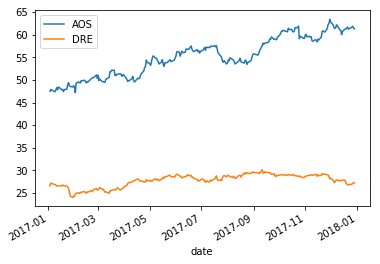

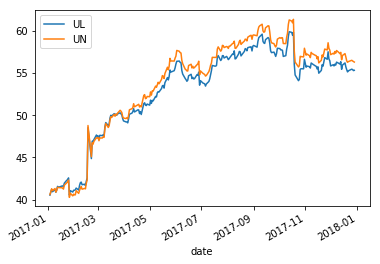

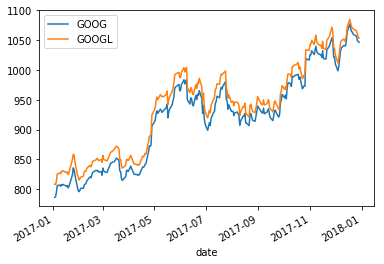

In [17]:
pd.DataFrame({"DM":ds.closing_data.DM, "HEP":ds.closing_data.HEP}).plot()
pd.DataFrame({"AOS":ds.closing_data.AOS, "RMD":ds.closing_data.RMD}).plot()
pd.DataFrame({"AOS":ds.closing_data.AOS, "DRE":ds.closing_data.DRE}).plot()



# These are the same companies
pd.DataFrame({"UL":ds.closing_data.UL, "UN":ds.closing_data.UN}).plot() 
pd.DataFrame({"GOOG":ds.closing_data.GOOG, "GOOGL":ds.closing_data.GOOGL}).plot() 
